In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Import Data

In [2]:
energy_data = pd.read_csv("data/energy_dataset.csv")
weather_data = pd.read_csv("data/weather_features.csv")

### Basic dataset analysis

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
energy_data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [4]:
weather_data.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


### Seperate weather data by city

In [5]:
cities = weather_data['city_name'].unique()
print (cities)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [6]:
Barcelona = weather_data[weather_data["city_name"]==" Barcelona"]
Valencia = weather_data[weather_data["city_name"]=="Valencia"]
Madrid = weather_data[weather_data["city_name"]=="Madrid"]
Bilbao = weather_data[weather_data["city_name"]=="Bilbao"]
Seville = weather_data[weather_data["city_name"]=="Seville"]
citiesList = [Barcelona, Valencia, Madrid, Bilbao, Seville]

### Convert and add timestamps to city weather data

In [7]:
Barcelona = Barcelona.assign(timestamp = pd.to_datetime(Barcelona["dt_iso"],errors='raise',utc=True))
Valencia = Valencia.assign(timestamp = pd.to_datetime(Valencia["dt_iso"],errors='raise',utc=True))
Madrid = Madrid.assign(timestamp = pd.to_datetime(Madrid["dt_iso"],errors='raise',utc=True))
Bilbao = Bilbao.assign(timestamp = pd.to_datetime(Bilbao["dt_iso"],errors='raise',utc=True))
Seville = Seville.assign(timestamp = pd.to_datetime(Seville["dt_iso"],errors='raise',utc=True))


### Find minimum number of timestamps in common
* need to determine if difference in timestamp number means duplicate timestamps, or begin and end timestamps for the 5 datasets

In [8]:
union_time_stamps = pd.concat([Barcelona['timestamp'], Valencia['timestamp'], Madrid['timestamp'], Bilbao['timestamp'], Seville['timestamp']])
intersect_time_stamps = set(union_time_stamps)
print(len(intersect_time_stamps))


35064


### Check for duplicates

In [9]:
# #Check 


# BarDupBool = time_stamp_Barcelona.duplicated(keep=False)
# Barcelona_filtered_bool = Barcelona[BarDupBool]

# ValDupBool = time_stamp_Valencia.duplicated(keep=False)
# Valencia_filtered_bool = Valencia[ValDupBool]

# MadridDupBool = time_stamp_Madrid.duplicated(keep=False)
# Madrid_filtered_bool = Madrid[MadridDupBool]

# BilbaoDupBool = time_stamp_Bilbao.duplicated(keep=False)
# Bilbao_filtered_bool = Bilbao[BilbaoDupBool]

# SevilleDupBool = time_stamp_Seville.duplicated(keep=False)
# Seville_filtered_bool = Seville[SevilleDupBool]
# Barcelona_filtered_bool

### Drop columns, sort by timestamp, delete duplicates
* Assuming temperature/humidity is most important factor in power consumption, so dropping other columns for now


In [10]:
dropColumnsWeather = ['dt_iso','wind_speed','wind_deg','rain_1h','rain_3h','snow_3h','clouds_all','weather_id','weather_main','weather_description','weather_icon']
Barcelona=Barcelona.drop(columns=dropColumnsWeather)
Valencia=Valencia.drop(columns=dropColumnsWeather)
Madrid=Madrid.drop(columns=dropColumnsWeather)
Bilbao=Bilbao.drop(columns=dropColumnsWeather)
Seville=Seville.drop(columns=dropColumnsWeather)

In [11]:
# sort
Barcelona=Barcelona.sort_values(['timestamp'])
Valencia=Valencia.sort_values(['timestamp'])
Madrid=Madrid.sort_values(['timestamp'])
Bilbao=Bilbao.sort_values(['timestamp'])
Seville=Seville.sort_values(['timestamp'])


In [12]:
Barcelona=Barcelona.drop_duplicates(subset=['timestamp'])
Valencia=Valencia.drop_duplicates(subset=['timestamp'])
Madrid=Madrid.drop_duplicates(subset=['timestamp'])
Bilbao=Bilbao.drop_duplicates(subset=['timestamp'])
Seville=Seville.drop_duplicates(subset=['timestamp'])


### Check DFs are same length and change column names, and reset indeces
* After deleting duplicates, length of each dataset = intersection of datasets meaning duplicates were responsible for the length discrepencies

In [13]:
print(len(Barcelona),len(Valencia),len(Madrid),len(Bilbao),len(Seville))

35064 35064 35064 35064 35064


In [14]:
Barcelona=Barcelona.rename(columns={"temp": "tempBar", "temp_min": "temp_minBar",'temp_max':'temp_maxBar','pressure':'pressureBar','humidity':'humidityBar'})
Valencia=Valencia.rename(columns={"temp": "tempVal", "temp_min": "temp_minVal",'temp_max':'temp_maxVal','pressure':'pressureVal','humidity':'humidityVal'})
Madrid=Madrid.rename(columns={"temp": "tempMad", "temp_min": "temp_minMad",'temp_max':'temp_maxMad','pressure':'pressureMad','humidity':'humidityMad'})
Bilbao=Bilbao.rename(columns={"temp": "tempBil", "temp_min": "temp_minBil",'temp_max':'temp_maxBil','pressure':'pressureBil','humidity':'humidityBil'})
Seville=Seville.rename(columns={"temp": "tempSev", "temp_min": "temp_minSev",'temp_max':'temp_maxSev','pressure':'pressureSev','humidity':'humiditySev'})


In [15]:
Barcelona.index = range(len(Barcelona))
Valencia.index = range(len(Valencia))
Madrid.index = range(len(Madrid))
Bilbao.index = range(len(Bilbao))
Seville.index = range(len(Seville))

### Add timestamps and sort for energy data 

In [16]:
energy_data['timestamps'] = pd.to_datetime(energy_data["time"],errors='raise',utc=True)
energy_data=energy_data.sort_values(['timestamps'])
energy_data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,timestamps
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00+00:00
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 00:00:00+00:00
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 01:00:00+00:00
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 02:00:00+00:00
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 03:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02,2018-12-31 18:00:00+00:00
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16,2018-12-31 19:00:00+00:00
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30,2018-12-31 20:00:00+00:00
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89,2018-12-31 21:00:00+00:00


### Drop NaN
* Only 18 columns max for relevant features so instead of filling in data, going to drop the full rows with any NaN

In [17]:
energy_data.isna().sum()
energy_data=energy_data.dropna(subset=['total load actual','generation biomass','generation fossil coal-derived gas','generation fossil gas','generation fossil hard coal','generation fossil oil','generation fossil oil shale','generation fossil peat','generation geothermal','generation hydro pumped storage consumption','generation hydro run-of-river and poundage','generation hydro water reservoir','generation marine','generation nuclear','generation other','generation other renewable','generation solar','generation waste','generation wind offshore'], axis=0)

In [18]:
energy_data.isna().sum()

time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35017
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other renewable                         0
generation solar                              

### Isolate generation sources

In [19]:
generation_data = pd.concat([energy_data['timestamps'], energy_data['generation biomass'], energy_data['generation fossil brown coal/lignite'], energy_data['generation fossil coal-derived gas'], energy_data['generation fossil gas'], \
energy_data['generation fossil hard coal'], energy_data['generation fossil oil'], energy_data['generation fossil oil shale'], energy_data['generation fossil peat'], energy_data['generation geothermal'], \
energy_data['generation hydro pumped storage consumption'], energy_data['generation hydro run-of-river and poundage'], energy_data['generation hydro water reservoir'], energy_data['generation marine'], \
energy_data['generation nuclear'], energy_data['generation other'], energy_data['generation other renewable'], energy_data['generation solar'], energy_data['generation wind offshore'], energy_data['generation wind onshore'],\
energy_data['generation waste']],axis=1)
generation_data

,timestamps,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation wind offshore,generation wind onshore,generation waste
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,0.0,6378.0,196.0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,0.0,5890.0,195.0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,0.0,5461.0,196.0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,0.0,5238.0,191.0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,0.0,4935.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,0.0,3113.0,277.0
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,0.0,3288.0,280.0
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,0.0,3503.0,286.0
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,0.0,3586.0,287.0


### Sum power generation

In [20]:
generation_sum = energy_data['generation biomass'] + energy_data['generation fossil brown coal/lignite'] + energy_data['generation fossil coal-derived gas'] + energy_data['generation fossil gas'] + \
energy_data['generation fossil hard coal'] + energy_data['generation fossil oil'] + energy_data['generation fossil oil shale'] + energy_data['generation fossil peat'] + energy_data['generation geothermal'] + \
energy_data['generation hydro pumped storage consumption'] + energy_data['generation hydro run-of-river and poundage'] + energy_data['generation hydro water reservoir'] + energy_data['generation marine'] + \
energy_data['generation nuclear'] + energy_data['generation other'] + energy_data['generation other renewable'] + energy_data['generation solar'] + energy_data['generation wind offshore'] + energy_data['generation wind onshore']+\
energy_data['generation waste']


### Create percent of total DF for each source by dividing each by total power generation

In [21]:
percent_gen = generation_data.iloc[:,1:].div(generation_sum,axis=0)
percent_gen

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation wind offshore,generation wind onshore,generation waste
0,0.015822,0.011646,0.0,0.171463,0.170649,0.005734,0.0,0.0,0.0,0.030548,0.037202,0.067219,0.0,0.251177,0.001522,0.002584,0.001734,0.0,0.225762,0.006938
1,0.016141,0.011791,0.0,0.186786,0.170932,0.005680,0.0,0.0,0.0,0.033072,0.036271,0.059602,0.0,0.255087,0.001546,0.002552,0.001797,0.0,0.211733,0.007010
2,0.016719,0.012054,0.0,0.181258,0.170958,0.005859,0.0,0.0,0.0,0.043439,0.036311,0.051164,0.0,0.264928,0.001605,0.002724,0.001866,0.0,0.203799,0.007315
3,0.017365,0.010070,0.0,0.171034,0.163779,0.006343,0.0,0.0,0.0,0.059588,0.037624,0.030885,0.0,0.281410,0.001705,0.002973,0.001982,0.0,0.207668,0.007572
4,0.017384,0.007595,0.0,0.167750,0.155971,0.006336,0.0,0.0,0.0,0.074167,0.038708,0.029245,0.0,0.288262,0.001747,0.003006,0.001706,0.0,0.200447,0.007677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.011244,0.000000,0.0,0.289002,0.099489,0.006739,0.0,0.0,0.0,0.000038,0.042968,0.183078,0.0,0.229907,0.002385,0.003596,0.003218,0.0,0.117850,0.010486
35060,0.011740,0.000000,0.0,0.287193,0.101773,0.006901,0.0,0.0,0.0,0.000040,0.046484,0.155912,0.0,0.240907,0.002459,0.003768,0.001309,0.0,0.130409,0.011105
35061,0.012173,0.000000,0.0,0.292867,0.100971,0.007004,0.0,0.0,0.0,0.002084,0.047859,0.118022,0.0,0.253304,0.002543,0.003919,0.001292,0.0,0.146037,0.011923
35062,0.012880,0.000000,0.0,0.288465,0.100800,0.007165,0.0,0.0,0.0,0.004748,0.049587,0.090909,0.0,0.267056,0.002682,0.004088,0.001363,0.0,0.157640,0.012616


### Check how many sources are value 0

In [22]:
(generation_data == 0).sum()

timestamps                                         0
generation biomass                                 2
generation fossil brown coal/lignite           10510
generation fossil coal-derived gas             35017
generation fossil gas                              1
generation fossil hard coal                        1
generation fossil oil                              1
generation fossil oil shale                    35017
generation fossil peat                         35017
generation geothermal                          35017
generation hydro pumped storage consumption    12590
generation hydro run-of-river and poundage         1
generation hydro water reservoir                   1
generation marine                              35017
generation nuclear                                 1
generation other                                   2
generation other renewable                         1
generation solar                                   1
generation wind offshore                      

### Histograms
* Absolute and percent of total

<AxesSubplot:>

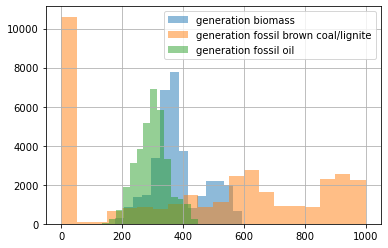

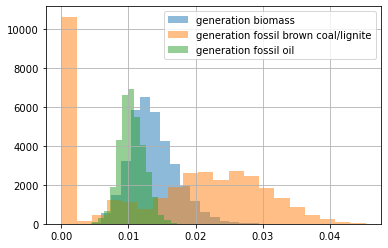

In [23]:
plt.figure()
generation_data['generation biomass'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation fossil brown coal/lignite'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation fossil oil'].hist(bins=20, alpha=0.5,legend=True)
plt.figure()
percent_gen['generation biomass'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation fossil brown coal/lignite'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation fossil oil'].hist(bins=20, alpha=0.5,legend=True)


<AxesSubplot:>

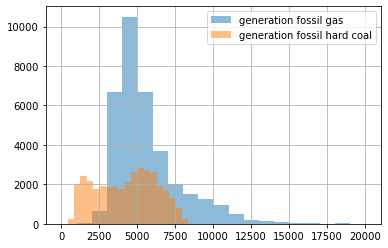

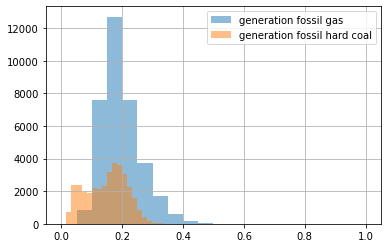

In [24]:
plt.figure()
generation_data['generation fossil gas'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation fossil hard coal'].hist(bins=20, alpha=0.5,legend=True)
plt.figure()
percent_gen['generation fossil gas'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation fossil hard coal'].hist(bins=20, alpha=0.5,legend=True)

<AxesSubplot:>

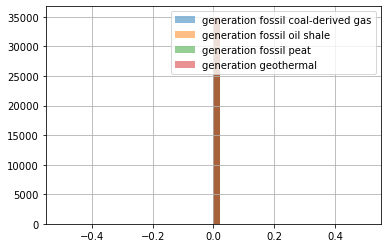

In [25]:
plt.figure()
generation_data['generation fossil coal-derived gas'].hist(bins=50, alpha=0.5,legend=True)
generation_data['generation fossil oil shale'].hist(bins=50, alpha=0.5,legend=True)
generation_data['generation fossil peat'].hist(bins=50, alpha=0.5,legend=True)
generation_data['generation geothermal'].hist(bins=50, alpha=0.5,legend=True)

# all 0

<AxesSubplot:>

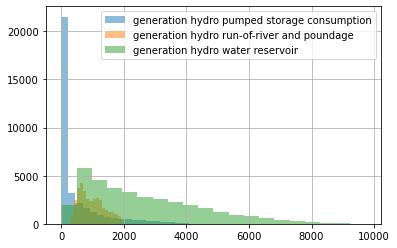

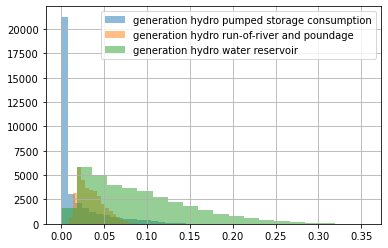

In [26]:
plt.figure()
generation_data['generation hydro pumped storage consumption'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation hydro run-of-river and poundage'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation hydro water reservoir'].hist(bins=20, alpha=0.5,legend=True)

plt.figure()
percent_gen['generation hydro pumped storage consumption'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation hydro run-of-river and poundage'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation hydro water reservoir'].hist(bins=20, alpha=0.5,legend=True)


<AxesSubplot:>

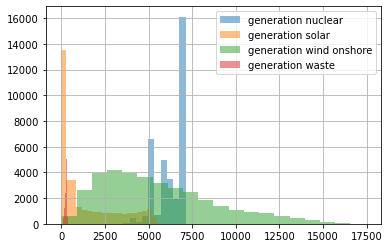

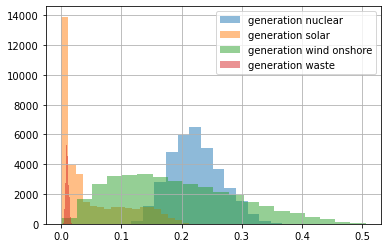

In [27]:
plt.figure()
generation_data['generation nuclear'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation solar'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation wind onshore'].hist(bins=20, alpha=0.5,legend=True)
generation_data['generation waste'].hist(bins=20, alpha=0.5,legend=True)

plt.figure()
percent_gen['generation nuclear'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation solar'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation wind onshore'].hist(bins=20, alpha=0.5,legend=True)
percent_gen['generation waste'].hist(bins=20, alpha=0.5,legend=True)

<AxesSubplot:>

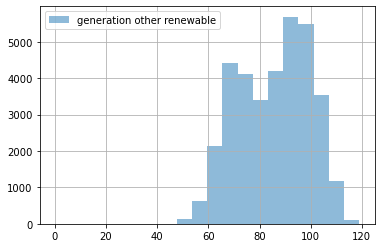

In [28]:
plt.figure()
generation_data['generation other renewable'].hist(bins=20, alpha=0.5,legend=True)

### Notes on above plots:
* Most energy still from fossil fuels
* Renewables play significant role, solar less than wind

### Price and total load follow normal distribution

<AxesSubplot:>

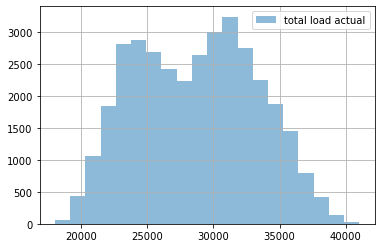

In [29]:
plt.figure()
energy_data['total load actual'].hist(bins=20, alpha=0.5,legend=True)

<AxesSubplot:>

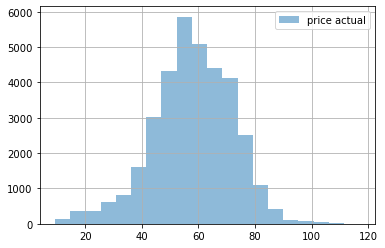

In [30]:
plt.figure()
energy_data['price actual'].hist(bins=20, alpha=0.5,legend=True)

### Plots over time

<AxesSubplot:>

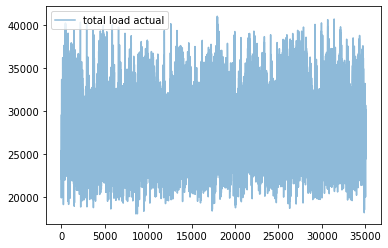

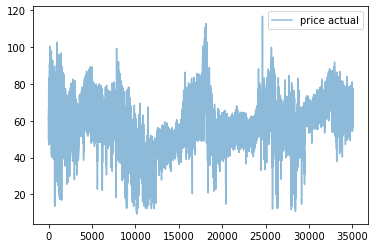

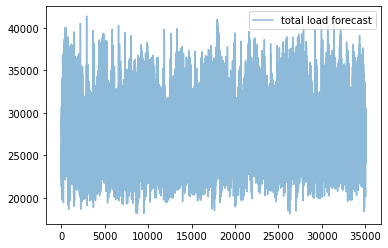

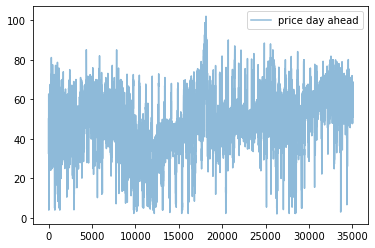

In [31]:
plt.figure()
energy_data['total load actual'].plot(legend=True, alpha=0.5)
plt.figure()
energy_data['price actual'].plot(legend=True, alpha=0.5)
plt.figure()
energy_data['total load forecast'].plot(legend=True, alpha=0.5)
plt.figure()
energy_data['price day ahead'].plot(legend=True, alpha=0.5)



### Weather features
* Histograms show similar weather across cities

<AxesSubplot:>

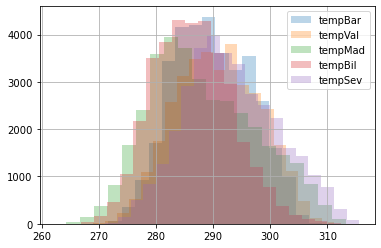

In [32]:
plt.figure()
Barcelona['tempBar'].hist(bins=20, alpha=0.3,legend=True)
Valencia['tempVal'].hist(bins=20, alpha=0.3,legend=True)
Madrid['tempMad'].hist(bins=20, alpha=0.3,legend=True)
Bilbao['tempBil'].hist(bins=20, alpha=0.3,legend=True)
Seville['tempSev'].hist(bins=20, alpha=0.3,legend=True)

<AxesSubplot:>

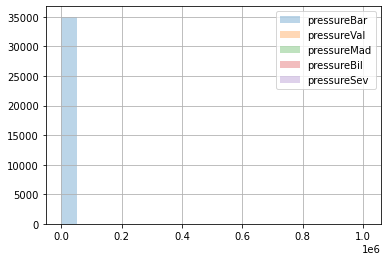

In [33]:
plt.figure()
Barcelona['pressureBar'].hist(bins=20, alpha=0.3,legend=True)
Valencia['pressureVal'].hist(bins=20, alpha=0.3,legend=True)
Madrid['pressureMad'].hist(bins=20, alpha=0.3,legend=True)
Bilbao['pressureBil'].hist(bins=20, alpha=0.3,legend=True)
Seville['pressureSev'].hist(bins=20, alpha=0.3,legend=True)

### filter out some erroneous pressure measurements

<AxesSubplot:>

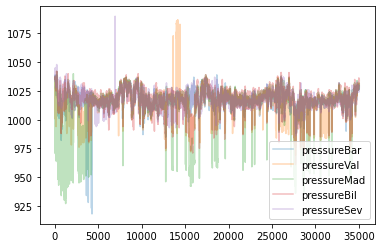

In [34]:
plt.figure()
Barcelona[(Barcelona["pressureBar"]<2000) & (Barcelona["pressureBar"]>800)]['pressureBar'].plot(alpha=0.3,legend=True)
Valencia[(Valencia["pressureVal"]<2000) & (Valencia["pressureVal"]>800)]["pressureVal"].plot(alpha=0.3,legend=True)
Madrid[(Madrid["pressureMad"]<2000) & (Madrid["pressureMad"]>800)]["pressureMad"].plot(alpha=0.3,legend=True)
Bilbao[(Bilbao["pressureBil"]<2000) & (Bilbao["pressureBil"]>800)]["pressureBil"].plot(alpha=0.3,legend=True)
Seville[(Seville["pressureSev"]<2000) & (Seville["pressureSev"]>800)]["pressureSev"].plot(alpha=0.3,legend=True)

In [35]:
Barcelona[Barcelona["pressureBar"]>2000]

,city_name,tempBar,temp_minBar,temp_maxBar,pressureBar,humidityBar,timestamp
1209,Barcelona,284.360000,284.360000,284.360000,102153,0,2015-02-20 08:00:00+00:00
1210,Barcelona,286.360000,286.360000,286.360000,102132,0,2015-02-20 09:00:00+00:00
1211,Barcelona,286.050000,286.050000,286.050000,102075,0,2015-02-20 10:00:00+00:00
1212,Barcelona,286.050000,286.050000,286.050000,101983,0,2015-02-20 11:00:00+00:00
1213,Barcelona,286.960000,286.960000,286.960000,101921,0,2015-02-20 12:00:00+00:00
1214,Barcelona,277.050000,277.050000,277.050000,101756,0,2015-02-20 13:00:00+00:00
1215,Barcelona,286.750000,286.750000,286.750000,10163,0,2015-02-20 14:00:00+00:00
1216,Barcelona,286.850000,286.850000,286.850000,101574,0,2015-02-20 15:00:00+00:00
1218,Barcelona,285.450000,285.450000,285.450000,10145,0,2015-02-20 17:00:00+00:00
1219,Barcelona,281.723313,281.723313,281.723313,40542,0,2015-02-20 18:00:00+00:00


<AxesSubplot:>

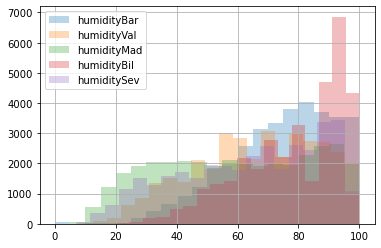

In [36]:
plt.figure()
Barcelona['humidityBar'].hist(bins=20, alpha=0.3,legend=True)
Valencia['humidityVal'].hist(bins=20, alpha=0.3,legend=True)
Madrid['humidityMad'].hist(bins=20, alpha=0.3,legend=True)
Bilbao['humidityBil'].hist(bins=20, alpha=0.3,legend=True)
Seville['humiditySev'].hist(bins=20, alpha=0.3,legend=True)

In [37]:
# # Many days with 100% humidity?

# plt.figure()
# Barcelona['humidityBar'].plot(alpha=0.3,legend=True)
# # Valencia['humidityVal'].plot(alpha=0.3,legend=True)
# # Madrid['humidityMad'].plot(alpha=0.3,legend=True)
# # Bilbao['humidityBil'].plot(alpha=0.3,legend=True)
# # Seville['humiditySev'].plot(alpha=0.3,legend=True)

In [38]:
# sns.pairplot(Barcelona.iloc[:,1:4])

### Correlation matrices

(5.5, -0.5)

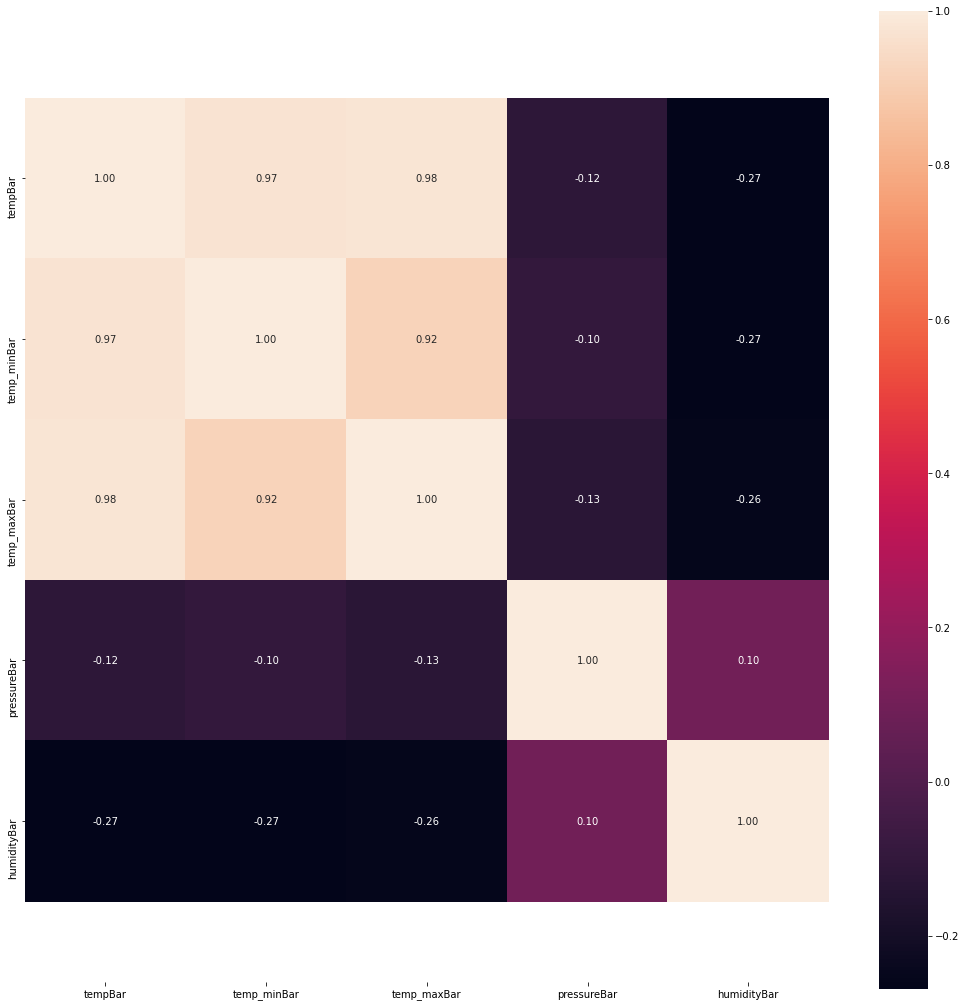

In [39]:
corr_Bar= Barcelona.iloc[:,1:6].corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_Bar, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.5, -0.5)

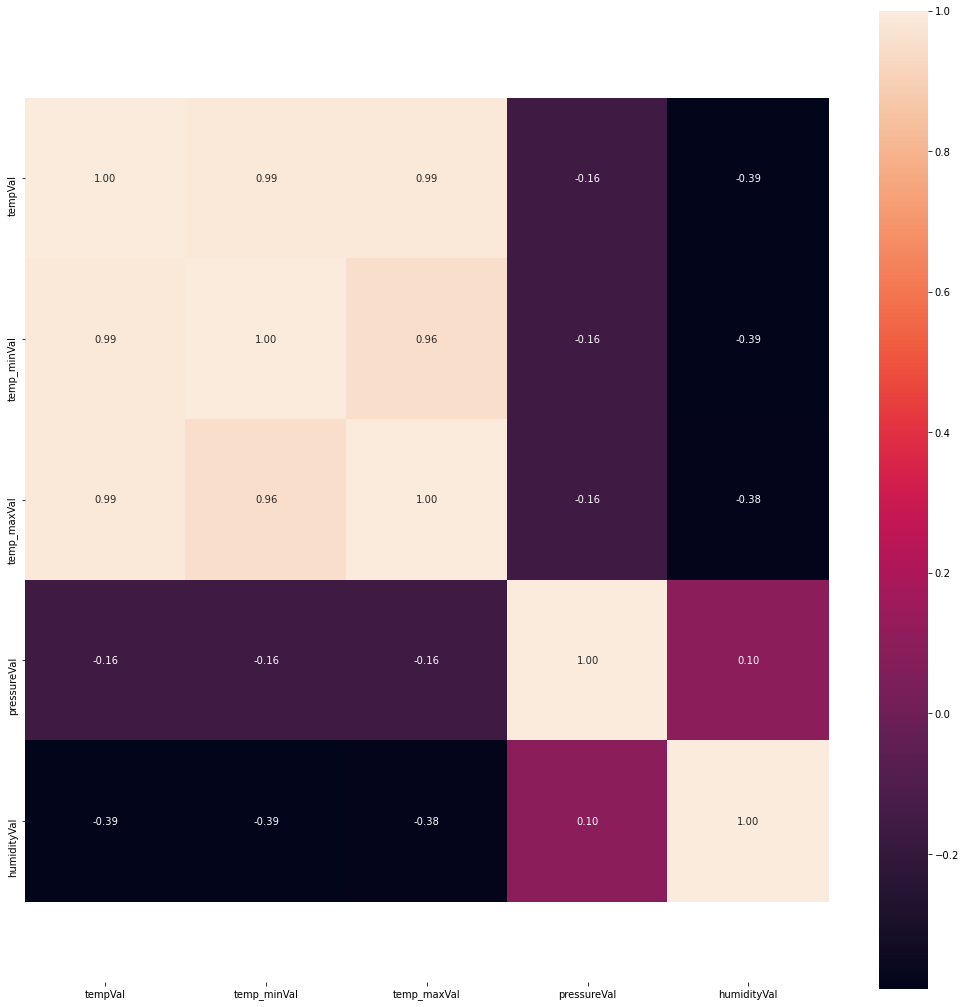

In [40]:
corr_Val = Valencia.iloc[:,1:6].corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_Val, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.5, -0.5)

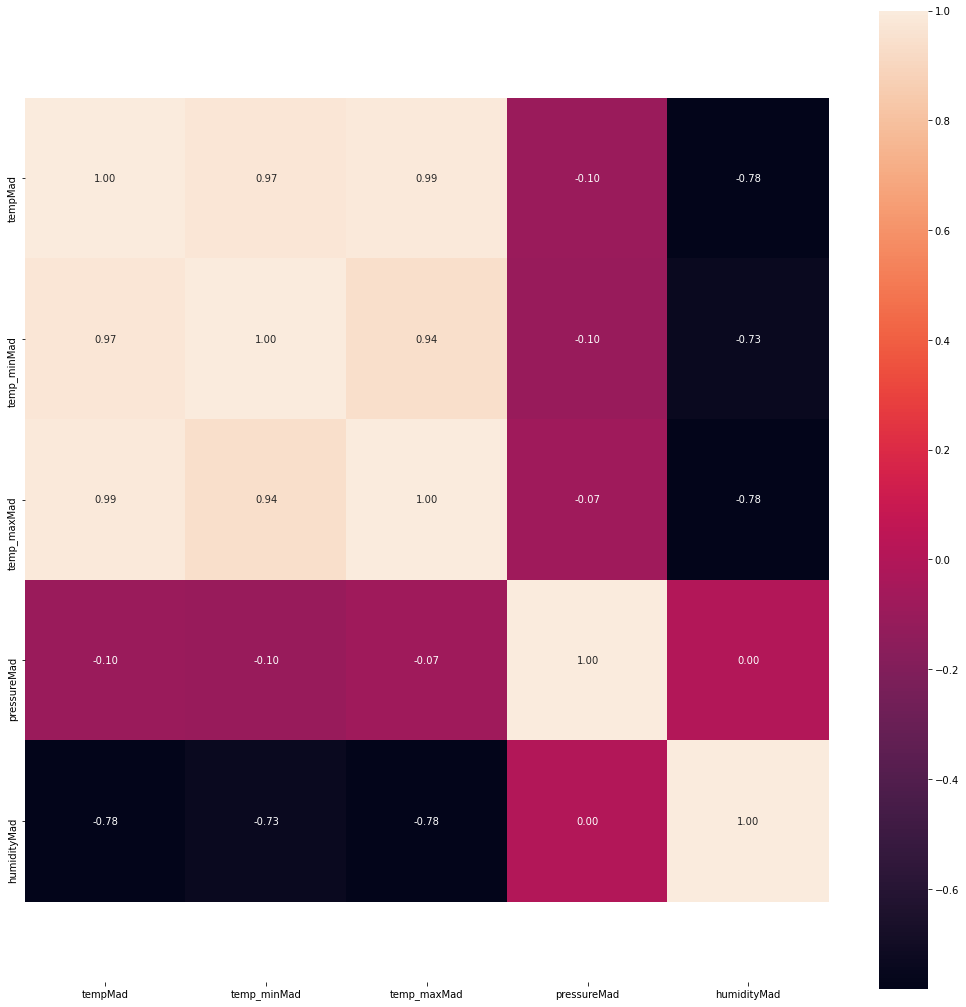

In [41]:
corr_Mad = Madrid.iloc[:,1:6].corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_Mad, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.5, -0.5)

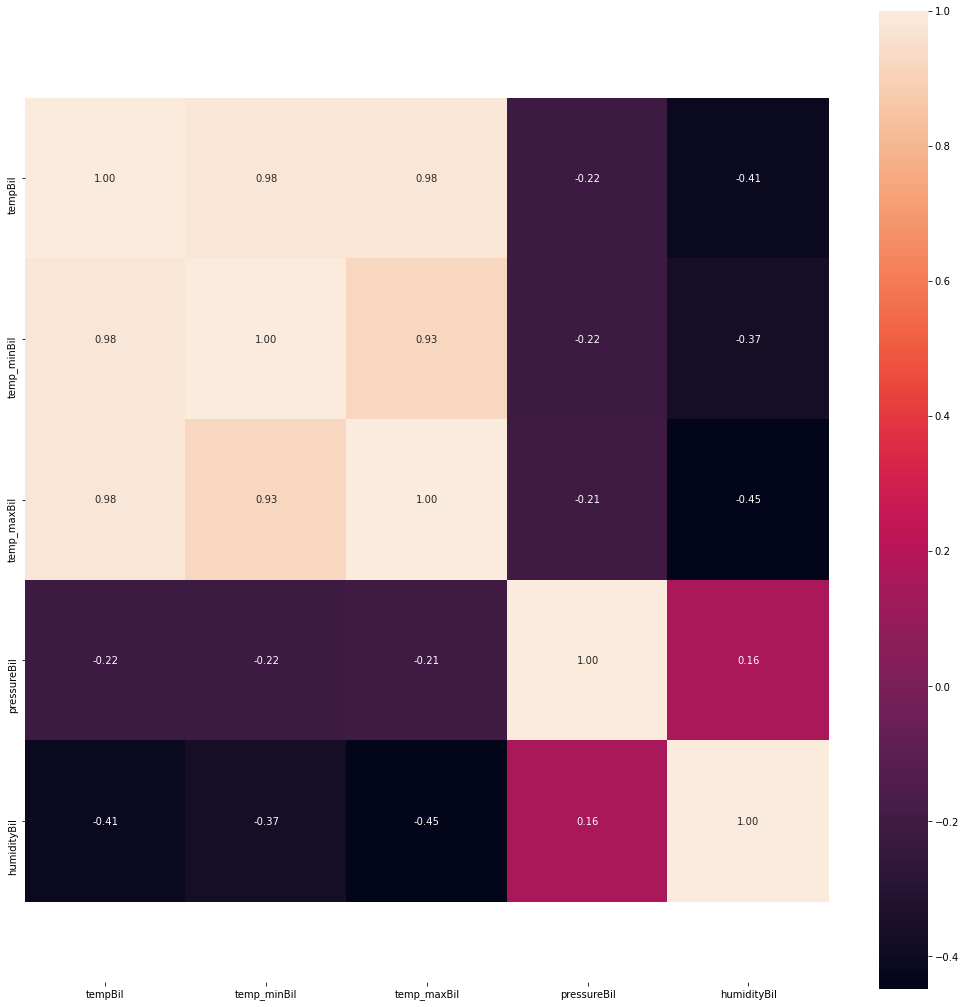

In [42]:
corr_Bil = Bilbao.iloc[:,1:6].corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_Bil, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.5, -0.5)

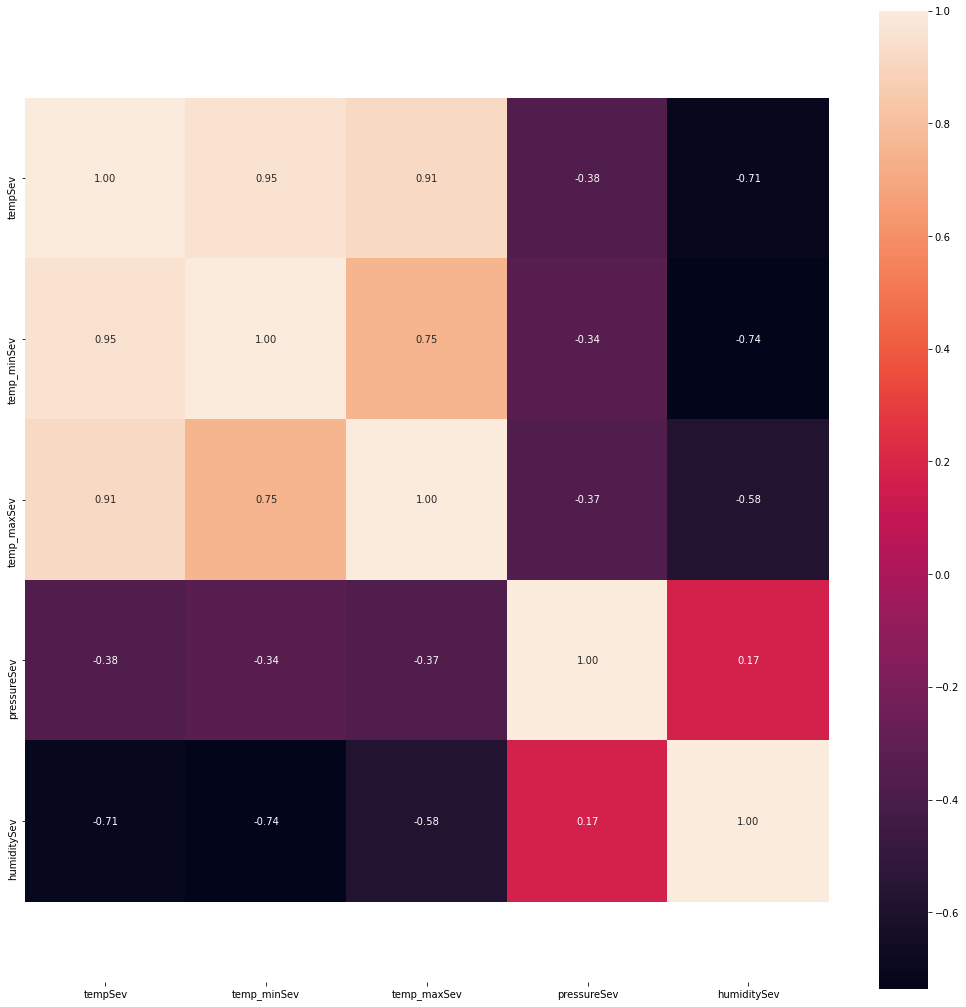

In [43]:
corr_Sev = Seville.iloc[:,1:6].corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_Sev, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Corr matrices between weather features above do not show a lot of correlation except between max/min/avg temp

### Corr plot between weather features and total load
* Very little correlation shown between load and weather feautres

(28.5, -0.5)

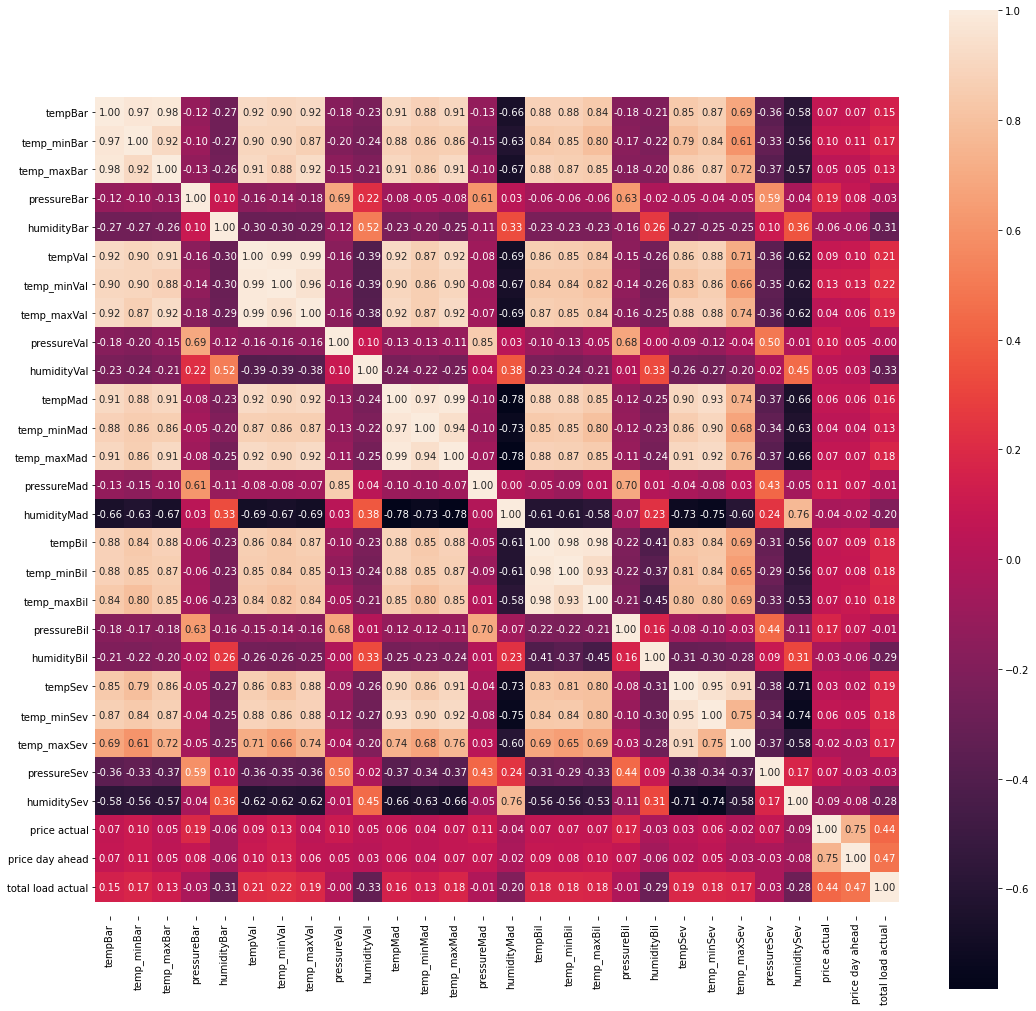

In [44]:
weather_load_price = pd.concat([Barcelona.iloc[:,1:6], Valencia.iloc[:,1:6], Madrid.iloc[:,1:6], Bilbao.iloc[:,1:6], Seville.iloc[:,1:6], energy_data['price actual'], energy_data['price day ahead'], energy_data['total load actual']],axis=1)
# weather_load_price = pd.concat([Barcelona.iloc[:,1:6], energy_data['price actual'], energy_data['price day ahead'], energy_data['total load actual']],axis=1)
weather_load_price = weather_load_price.dropna(subset=['total load actual'], axis=0)

corr_weather_load_price = weather_load_price.corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_weather_load_price, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [45]:
energy_and_price = pd.concat([generation_data, energy_data['price actual'], energy_data['price day ahead'], energy_data['total load actual']], axis=1)
energy_and_price_percent = pd.concat([percent_gen, energy_data['price actual'], energy_data['price day ahead'], energy_data['total load actual']], axis=1)

### Highest absolute correlation between load and humidity in Valencia. Scatter plot shows small negative correlation but a lot of noise

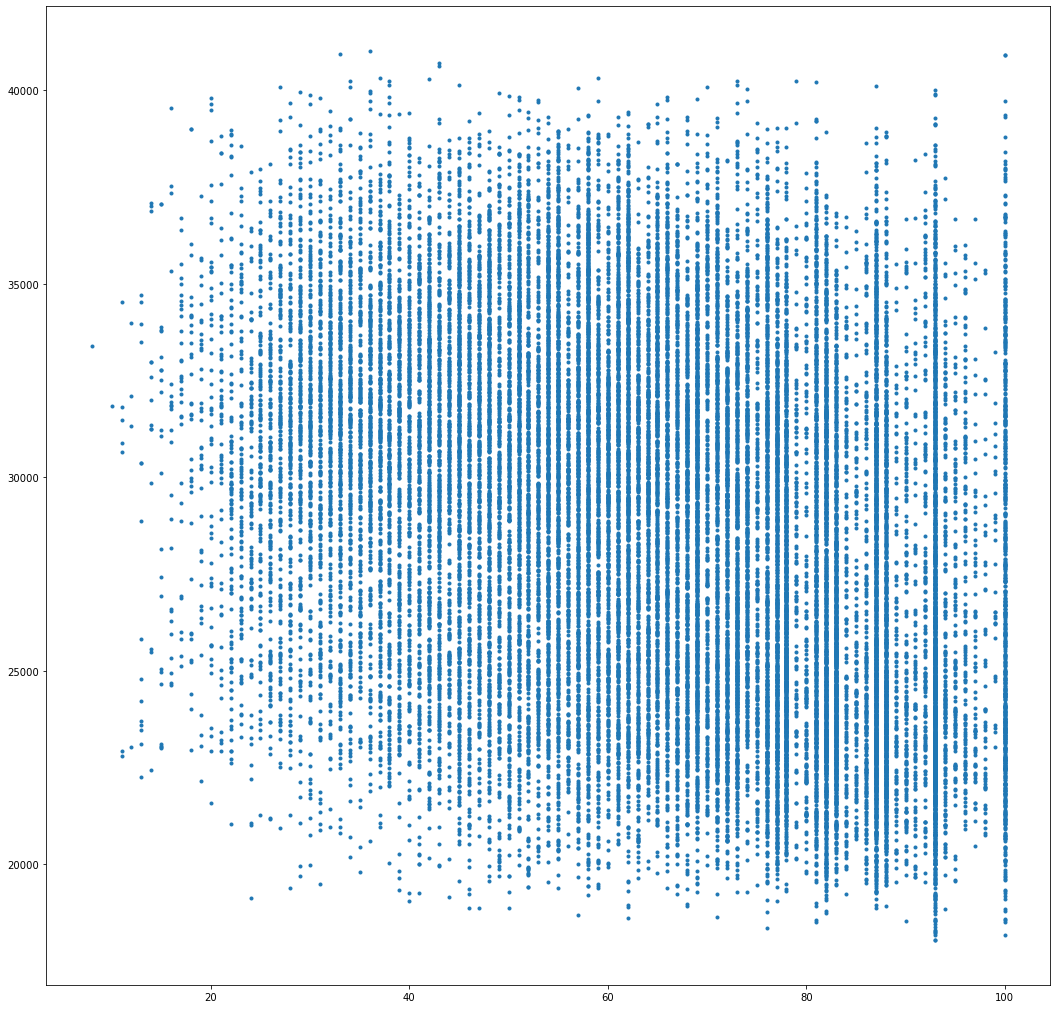

In [46]:
plt.scatter(weather_load_price["humidityVal"], weather_load_price["total load actual"], marker=".")

### Correlation between price and generation sources
* Again, not too much correlation, only with certain features like fossil gas and solar.
* Fossil fuel sources should be cheaper in theory and therefore have smaller correlation with price than renewables?

(23.5, -0.5)

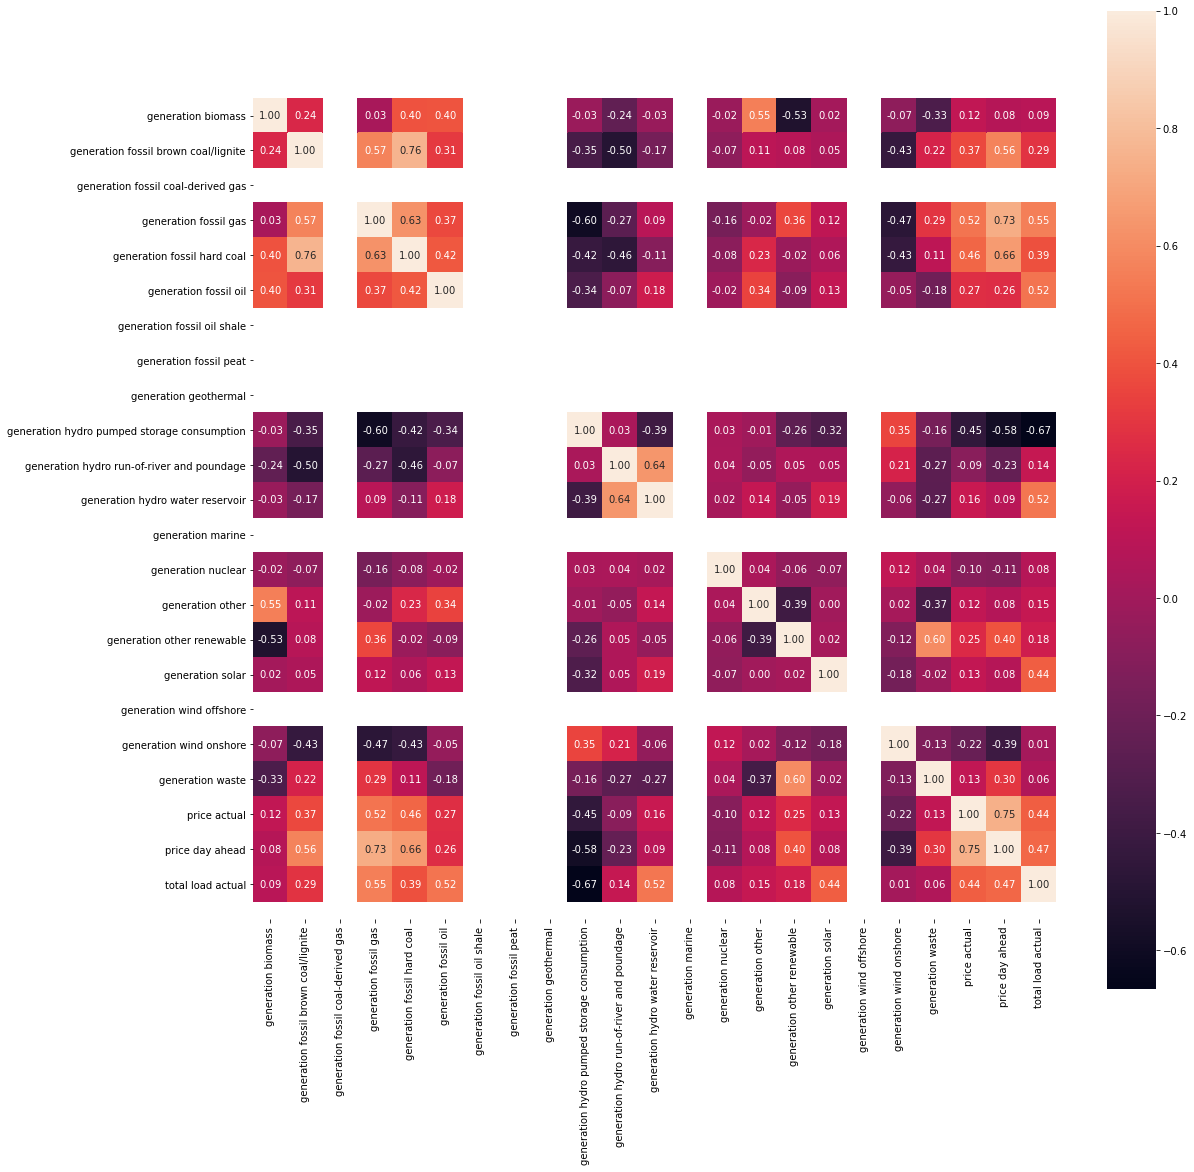

In [47]:

corr_energy_and_price = energy_and_price.corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_energy_and_price, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Correlation between price and generation sources as a percent of total
* Again, not too much correlation

(23.5, -0.5)

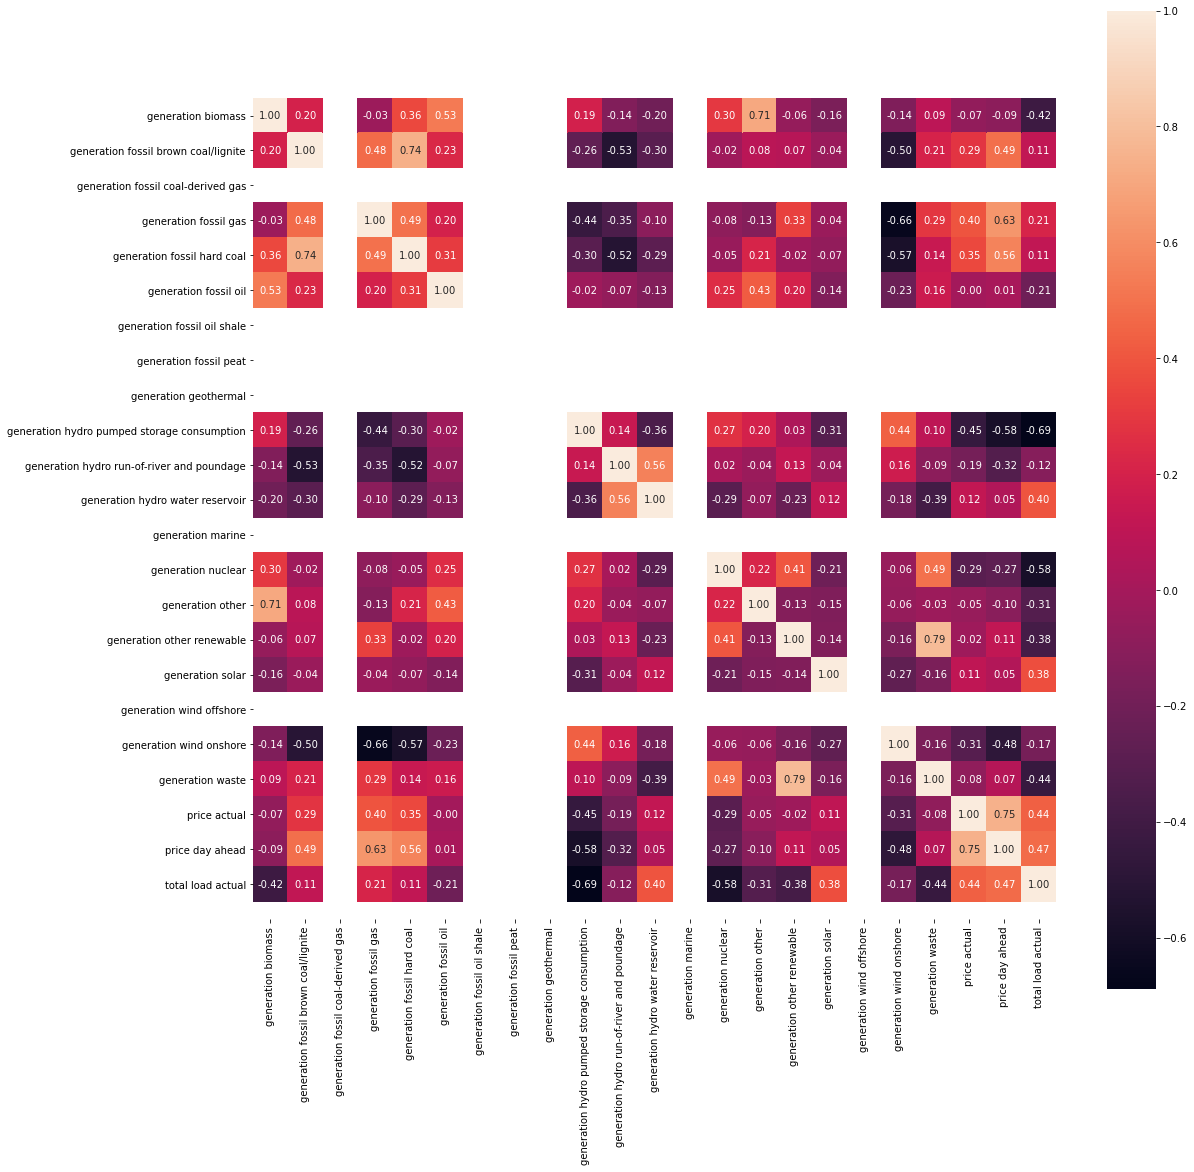

In [48]:

corr_energy_and_price_percent = energy_and_price_percent.corr(method= 'spearman')
plt.rcParams['figure.figsize']=(18,18)
ax = sns.heatmap(corr_energy_and_price_percent, xticklabels=True, yticklabels=True, 
                 annot=True,square=True,fmt='0.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Regression: X = percent of total generation for each energy sources. Y = actual price
- (between generation sources and actual load, crazy error, even though there is slight correlation on plot)

In [49]:
# X_1 = np.array(energy_and_price_percent.iloc[:,np.r_[0:2, 3:6, 9:12, 13:17, 18:20]])
X_1 = np.array(energy_and_price_percent.iloc[:,0:20])
scaler = StandardScaler().fit(X_1)
X_1scaled = scaler.transform(X_1)
y_1 = np.array(energy_and_price_percent['price actual'])

In [50]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1scaled, y_1, test_size = 0.2, random_state = 40)

In [51]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1,y_train_1)

LinearRegression()

In [52]:
y_pred_1 = reg_1.predict(X_test_1)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_1))

Mean Squared Error: 141.0740797490059


 ### Regression: X = generation of energy sources . Y = actual price
 - (between generation sources and actual load, crazy error, even though there is slight correlation on plot)

In [53]:
X_2 = np.array(energy_and_price.iloc[:,1:21])
y_2 = np.array(energy_and_price['price actual'])


In [54]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 40)

In [55]:
reg_2 = LinearRegression()
reg_2.fit(X_train_2, y_train_2)

LinearRegression()

In [56]:
y_pred_2 = reg_2.predict(X_test_2)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2))

Mean Squared Error: 128.40494846327542


 ### Regression: X = weather features in each city . Y = total load
 * 16189926.279390745 mean squaured error which is extremely high

In [57]:
X_3 = np.array(weather_load_price.iloc[:,0:25])
y_3 = np.array(weather_load_price['total load actual'])

In [58]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2)

In [59]:
reg_3 = LinearRegression()
reg_3.fit(X_train_3, y_train_3)


LinearRegression()

In [60]:
y_pred_3 = reg_3.predict(X_test_3)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, y_pred_3))

Mean Squared Error: 16498693.819005623


In [61]:
# next try random forests for all three. Try summer months and winter months for weather correlation


In [62]:
# test1 = np.arange(100).reshape(-1, 1)
# test2 = np.arange(100,0,-1).reshape(-1, 1)
# test2 = test2
# print(test1, np.shape(test1))
# print(test2, np.shape(test2))
# X_4 = test1
# y_4 = test2

# X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.2, random_state = 40)
# reg_4 = LinearRegression()
# reg_4.fit(X_train_4, y_train_4)
# y_pred_4 = reg_4.predict(X_test_4)
# print('Mean Squared Error:', metrics.mean_squared_error(y_test_4, y_pred_4))

### Linear fit did not work well at all so try Random Forest next

### Random Forest: X = percent of total generation for each energy sources. Y = actual price
* Better results but 46.39 is still not great

In [63]:
reg_rf_1 = RandomForestRegressor()
reg_rf_1.fit(X_train_1, y_train_1)
y_pred_1_rf = reg_rf_1.predict(X_test_1)

In [64]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_1_rf))

Mean Squared Error: 46.22825926537693


In [65]:
features_1 = []
for i in range(0,20):
    features_1.append(energy_and_price_percent.columns[i])
feature_df_1 = pd.DataFrame({'Importance':reg_rf_1.feature_importances_, 'Features': features_1 })
print(feature_df_1)

    Importance                                     Features
0     0.050609                           generation biomass
1     0.035265         generation fossil brown coal/lignite
2     0.000000           generation fossil coal-derived gas
3     0.067662                        generation fossil gas
4     0.133612                  generation fossil hard coal
5     0.051947                        generation fossil oil
6     0.000000                  generation fossil oil shale
7     0.000000                       generation fossil peat
8     0.000000                        generation geothermal
9     0.198789  generation hydro pumped storage consumption
10    0.068257   generation hydro run-of-river and poundage
11    0.055702             generation hydro water reservoir
12    0.000000                            generation marine
13    0.092804                           generation nuclear
14    0.051899                             generation other
15    0.061117                   generat

 ### Random Forest: X = generation of energy sources . Y = actual price
 * Better results but 31.62 is still not great

In [66]:
reg_rf_2 = RandomForestRegressor()
reg_rf_2.fit(X_train_2, y_train_2)
y_pred_2_rf = reg_rf_2.predict(X_test_2)

In [67]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2_rf))

Mean Squared Error: 31.954315672110223


In [68]:
features_2 = []
for i in range(1,21):
    features_2.append(energy_and_price.columns[i])
feature_df = pd.DataFrame({'Importance':reg_rf_2.feature_importances_, 'Features': features_2 })
print(feature_df)

    Importance                                     Features
0     0.041612                           generation biomass
1     0.032596         generation fossil brown coal/lignite
2     0.000000           generation fossil coal-derived gas
3     0.253937                        generation fossil gas
4     0.131761                  generation fossil hard coal
5     0.048570                        generation fossil oil
6     0.000000                  generation fossil oil shale
7     0.000000                       generation fossil peat
8     0.000000                        generation geothermal
9     0.041597  generation hydro pumped storage consumption
10    0.067917   generation hydro run-of-river and poundage
11    0.061862             generation hydro water reservoir
12    0.000000                            generation marine
13    0.077199                           generation nuclear
14    0.042695                             generation other
15    0.070286                   generat

In [69]:
X_2_prime = np.array(energy_and_price.loc[:,["generation fossil gas", "generation fossil hard coal","generation biomass","generation nuclear"]])
y_2_prime = np.array(energy_and_price['price actual'])


In [70]:
X_train_2_prime, X_test_2_prime, y_train_2_prime, y_test_2_prime = train_test_split(X_2_prime, y_2_prime, test_size = 0.2)

In [71]:
reg_rf_2_prime = RandomForestRegressor()
reg_rf_2_prime.fit(X_train_2_prime, y_train_2_prime)
y_pred_2_rf_prime = reg_rf_2_prime.predict(X_test_2_prime)

In [72]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2_prime, y_pred_2_rf_prime))

Mean Squared Error: 60.903423770005716


 ### Random Forest: X = weather features in each city . Y = total load
 * Random Forest still generating very high error. 
 * It's possible that since this is weather data over the course of and hot and cold seasons, trends may be equal and opposite and "cancel each other out." Need to seperate hot months and cold months next to see if any trends can be found

In [73]:
reg_rf_3 = RandomForestRegressor()
reg_rf_3.fit(X_train_3, y_train_3)
y_pred_3_rf = reg_rf_3.predict(X_test_3)

In [74]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, y_pred_3_rf))

Mean Squared Error: 8821099.101350341
